In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset, ConcatDataset
import matplotlib.pyplot as plt
import numpy as np

# Check if MPS (Metal Performance Shaders) is available (for M1 Macs)
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

Using device: cuda


# Network.py

In [3]:
import torch
import torch.nn as nn

def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)

def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, use_residual=True, use_bn=True):
        super(BasicBlock, self).__init__()
        self.use_residual = use_residual
        norm_layer = nn.BatchNorm2d if use_bn else nn.Identity
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        if self.use_residual:
            out += identity
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10, use_residual=True, use_bn=True):
        super(ResNet, self).__init__()
        self.inplanes = 64
        norm_layer = nn.BatchNorm2d if use_bn else nn.Identity

        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0], use_residual=use_residual, use_bn=use_bn)
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, use_residual=use_residual, use_bn=use_bn)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2, use_residual=use_residual, use_bn=use_bn)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2, use_residual=use_residual, use_bn=use_bn)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, planes, blocks, stride=1, use_residual=True, use_bn=True):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            norm_layer = nn.BatchNorm2d if use_bn else nn.Identity
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, use_residual=use_residual, use_bn=use_bn))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, use_residual=use_residual, use_bn=use_bn))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

def resnet18(use_residual=True, use_bn=True, **kwargs):
    return ResNet(BasicBlock, [2, 2, 2, 2], use_residual=use_residual, use_bn=use_bn, **kwargs)


# ImageUtils.py

In [4]:
import numpy as np

""" This script implements the functions for data augmentation and preprocessing.
"""

def parse_record(record, training):
    """ Parse a record to an image and perform data preprocessing.

    Args:
        record: An array of shape [3072,]. One row of the x_* matrix.
        training: A boolean. Determine whether it is in training mode.

    Returns:
        image: An array of shape [3, 32, 32].
    """
    # Reshape from [depth * height * width] to [depth, height, width].
    depth_major = record.reshape((3, 32, 32))

    # Convert from [depth, height, width] to [height, width, depth]
    image = np.transpose(depth_major, [1, 2, 0])

    image = preprocess_image(image, training)

    # Convert from [height, width, depth] to [depth, height, width]
    image = np.transpose(image, [2, 0, 1])

    return image

def preprocess_image(image, training):
    """ Preprocess a single image of shape [height, width, depth].

    Args:
        image: An array of shape [32, 32, 3].
        training: A boolean. Determine whether it is in training mode.
    
    Returns:
        image: An array of shape [32, 32, 3].
    """
    # if training:
        ### YOUR CODE HERE
        # Resize the image to add four extra pixels on each side.
        
        ### YOUR CODE HERE

        ### YOUR CODE HERE
        # Randomly crop a [32, 32] section of the image.
        # HINT: randomly generate the upper left point of the image
        
        ### YOUR CODE HERE

        ### YOUR CODE HERE
        # Randomly flip the image horizontally.
        
        ### YOUR CODE HERE

    ### YOUR CODE HERE
    # Subtract off the mean and divide by the standard deviation of the pixels.
    
    ### YOUR CODE HERE

    if training:
        # 1. Pad the image with 4 pixels on each side (top, bottom, left, right)
        image = np.pad(image, ((4, 4), (4, 4), (0, 0)), mode='constant')

        # 2. Randomly crop a [32, 32] section of the image
        x_start = np.random.randint(0, 9)  # Crop range in padded 40x40 image
        y_start = np.random.randint(0, 9)
        image = image[x_start:x_start+32, y_start:y_start+32, :]

        # 3. Randomly flip the image horizontally
        if np.random.rand() > 0.5:
            image = np.fliplr(image)
    
    # 4. Per-channel normalization
    mean = np.mean(image, axis=(0, 1), keepdims=True)
    std = np.std(image, axis=(0, 1), keepdims=True)
    image = (image - mean) / (std + 1e-7)  # Add small epsilon to avoid division by zero

    return image

# Model.py

In [5]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

#from NetWork import resnet18
#from ImageUtils import parse_record

class Cifar(nn.Module):
    def __init__(self, config):
        super(Cifar, self).__init__()
        self.config = config
        # Initialize the network based on configuration settings
        self.network = resnet18(use_residual=config.use_residual, use_bn=config.use_bn)
        self.loss_fn = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.network.parameters(), lr=config.lr, weight_decay=config.weight_decay)
        self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=1/1.5)
        self.train_loss_history = []

    def train(self, x_train, y_train, max_epoch):
        self.network.train()
        num_samples = x_train.shape[0]
        num_batches = num_samples // self.config.batch_size

        print('### Training... ###')
        for epoch in range(1, max_epoch + 1):
            start_time = time.time()
            # Shuffle data at the start of each epoch
            shuffle_index = np.random.permutation(num_samples)
            curr_x_train = x_train[shuffle_index]
            curr_y_train = y_train[shuffle_index]

            epoch_loss = 0.0  # Track loss for the epoch

            for i in range(num_batches):
                start_idx = i * self.config.batch_size
                end_idx = (i + 1) * self.config.batch_size
                batch_x = np.array([parse_record(record, training=True) for record in curr_x_train[start_idx:end_idx]])
                batch_y = curr_y_train[start_idx:end_idx]

                # Convert to torch tensors and move to configured device
                batch_x = torch.tensor(batch_x, dtype=torch.float32).to(self.config.device)
                batch_y = torch.tensor(batch_y, dtype=torch.long).to(self.config.device)

                # Forward pass
                logits = self.network(batch_x)
                loss = self.loss_fn(logits, batch_y)

                # Backward pass and optimization
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                epoch_loss += loss.item()
                print('Batch {:d}/{:d} Loss {:.6f}'.format(i + 1, num_batches, loss.item()), end='\r', flush=True)

            # Average loss for the epoch
            avg_loss = epoch_loss / num_batches
            self.train_loss_history.append(avg_loss)
            self.scheduler.step()  # Update learning rate per epoch

            duration = time.time() - start_time
            print('Epoch {:d} Loss {:.6f} Duration {:.3f} seconds.'.format(epoch, avg_loss, duration))

            # Save model checkpoint at specified intervals
            if epoch % self.config.save_interval == 0:
                self.save(epoch)

        # Plot the training loss curve
        plt.plot(self.train_loss_history, label='Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss Curve')
        plt.legend()
        plt.show()

    def test_or_validate(self, x, y, checkpoint_num_list):
        self.network.eval()
        print('### Test or Validation ###')
        for checkpoint_num in checkpoint_num_list:
            checkpointfile = os.path.join(self.config.modeldir, 'model-%d.ckpt' % (checkpoint_num))
            self.load(checkpointfile)

            preds = []
            with torch.no_grad():
                for i in tqdm(range(x.shape[0])):
                    # Preprocess the input record and make predictions
                    record = parse_record(x[i], training=False)
                    record = torch.tensor(record, dtype=torch.float32).unsqueeze(0).to(self.config.device)

                    logits = self.network(record)
                    pred = torch.argmax(logits, dim=1).item()
                    preds.append(pred)

            # Calculate accuracy
            y_tensor = torch.tensor(y, dtype=torch.long).to(self.config.device)
            preds_tensor = torch.tensor(preds, dtype=torch.long).to(self.config.device)
            accuracy = torch.sum(preds_tensor == y_tensor).item() / y_tensor.size(0)
            print('Checkpoint {} Test accuracy: {:.4f}'.format(checkpoint_num, accuracy))

    def save(self, epoch):
        checkpoint_path = os.path.join(self.config.modeldir, 'model-%d.ckpt' % (epoch))
        os.makedirs(self.config.modeldir, exist_ok=True)
        torch.save(self.network.state_dict(), checkpoint_path)
        print("Checkpoint has been created.")

    def load(self, checkpoint_name):
        ckpt = torch.load(checkpoint_name, map_location=self.config.device)
        self.network.load_state_dict(ckpt, strict=True)
        print("Restored model parameters from {}".format(checkpoint_name))

# DataReader.py

In [6]:
import os
import pickle
import numpy as np
import tarfile

""" This script implements the functions for reading data.
"""

def extract_data(file_path, extract_dir):
    """ Extracts the CIFAR-10 dataset if it's not already extracted.
    
    Args:
        file_path: A string. The path to the cifar-10-python.tar.gz file.
        extract_dir: A string. The directory where data should be extracted.
    """
    if os.path.exists(extract_dir):
        with tarfile.open(file_path, 'r:gz') as tar:
            tar.extractall(path=extract_dir)
            print("Extraction completed.")
    else:
        print("Invalid Path")
    

def load_data(data_dir):
    """ Load the CIFAR-10 dataset.

    Args:
        data_dir: A string. The directory where data batches are stored.
    
    Returns:
        x_train: An numpy array of shape [50000, 3072]. 
        (dtype=np.float32)
        y_train: An numpy array of shape [50000,]. 
        (dtype=np.int32)
        x_test: An numpy array of shape [10000, 3072]. 
        (dtype=np.float32)
        y_test: An numpy array of shape [10000,]. 
        (dtype=np.int32)
    """
    ### YOUR CODE HERE
    # Initialize empty lists to hold training data
    x_train_list, y_train_list = [], []
    
    # Loop through data batches (1 to 5 are training batches)
    for i in range(1, 6):
        file_path = os.path.join(data_dir, f'data_batch_{i}')
        with open(file_path, 'rb') as file:
            batch = pickle.load(file, encoding='bytes')
            x_train_list.append(batch[b'data'])
            y_train_list.extend(batch[b'labels'])
    
    # Convert lists to numpy arrays
    x_train = np.concatenate(x_train_list, axis=0).astype(np.float32)
    y_train = np.array(y_train_list, dtype=np.int32)
    
    # Load test data
    test_file_path = os.path.join(data_dir, 'test_batch')
    with open(test_file_path, 'rb') as file:
        test_batch = pickle.load(file, encoding='bytes')
        x_test = test_batch[b'data'].astype(np.float32)
        y_test = np.array(test_batch[b'labels'], dtype=np.int32)
    
    # Normalize the data to [0, 1] range by dividing by 255.0
    x_train /= 255.0
    x_test /= 255.0
    ### YOUR CODE HERE

    return x_train, y_train, x_test, y_test

def train_vaild_split(x_train, y_train, split_index=45000):
    """ Split the original training data into a new training dataset
        and a validation dataset.
    
    Args:
        x_train: An array of shape [50000, 3072].
        y_train: An array of shape [50000,].
        split_index: An integer.

    Returns:
        x_train_new: An array of shape [split_index, 3072].
        y_train_new: An array of shape [split_index,].
        x_valid: An array of shape [50000-split_index, 3072].
        y_valid: An array of shape [50000-split_index,].
    """
    x_train_new = x_train[:split_index]
    y_train_new = y_train[:split_index]
    x_valid = x_train[split_index:]
    y_valid = y_train[split_index:]

    return x_train_new, y_train_new, x_valid, y_valid


# wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
# # Usage
# file_path = '/home/grads/s/skpaul/Deep-ResNet-CIFAR-10/cifar-10-python.tar.gz'  # Update with the correct path
# extract_dir = '/home/grads/s/skpaul/Deep-ResNet-CIFAR-10/dataset'  # Directory where you want to extract files

# # Step 1: Extract the CIFAR-10 dataset
# extract_data(file_path, extract_dir)

# # Step 2: Load the data
# data_dir = os.path.join(extract_dir, 'cifar-10-batches-py')  # Adjust if needed
# x_train, y_train, x_test, y_test = load_data(data_dir)

# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# x_train_new, y_train_new, x_valid, y_valid = train_vaild_split(x_train, y_train)
# print(x_train_new.shape, y_train_new.shape, x_valid.shape, y_valid.shape)

--- Preparing Data ---
(45000, 3072) (45000,) (5000, 3072) (5000,) (10000, 3072) (10000,)
cuda
--- Starting Training ---
### Training... ###
Epoch 1 Loss 2.039710 Duration 10.385 seconds.
Epoch 2 Loss 1.517706 Duration 10.019 seconds.
Epoch 3 Loss 1.311612 Duration 10.391 seconds.
Epoch 4 Loss 1.196401 Duration 10.087 seconds.
Epoch 5 Loss 1.130557 Duration 9.901 seconds.
Epoch 6 Loss 1.085166 Duration 10.096 seconds.
Epoch 7 Loss 1.052790 Duration 9.980 seconds.
Epoch 8 Loss 1.026934 Duration 9.999 seconds.
Epoch 9 Loss 1.014095 Duration 10.015 seconds.
Epoch 10 Loss 0.988817 Duration 9.887 seconds.
Checkpoint has been created.
Epoch 11 Loss 0.906860 Duration 9.693 seconds.
Epoch 12 Loss 0.904237 Duration 9.965 seconds.
Epoch 13 Loss 0.885455 Duration 10.135 seconds.
Epoch 14 Loss 0.873533 Duration 10.110 seconds.
Epoch 15 Loss 0.867581 Duration 10.020 seconds.
Epoch 16 Loss 0.855818 Duration 10.226 seconds.
Epoch 17 Loss 0.848894 Duration 9.983 seconds.
Epoch 18 Loss 0.843844 Duratio

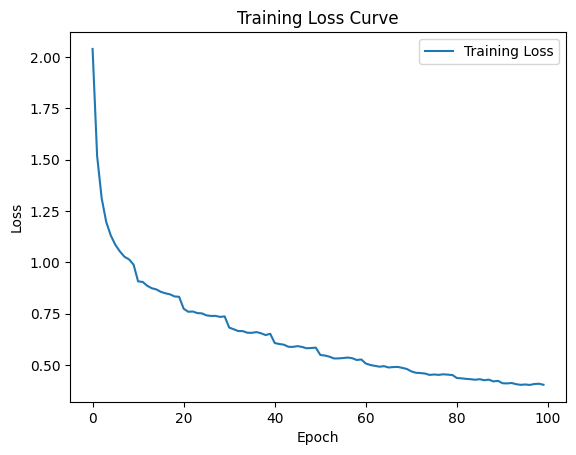

--- Validating on Validation Set ---
### Test or Validation ###


/tmp/ipykernel_3910070/2409967368.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(checkpoint_name, map_location=self.config.device)


Restored model parameters from model_v2/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 914.59it/s]


Checkpoint 80 Test accuracy: 0.8010
Restored model parameters from model_v2/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 914.28it/s]


Checkpoint 90 Test accuracy: 0.8016
Restored model parameters from model_v2/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 910.66it/s]


Checkpoint 100 Test accuracy: 0.8084
--- Testing on Test Set ---
### Test or Validation ###
Restored model parameters from model_v2/model-100.ckpt


100%|██████████| 10000/10000 [00:10<00:00, 915.23it/s]

Checkpoint 100 Test accuracy: 0.8046


In [6]:
#from ImageUtils import parse_record
#from DataReader import load_data, train_vaild_split
#from Model import Cifar

import os
import argparse
import torch

def configure():
    parser = argparse.ArgumentParser()
    # Basic model and training parameters
    parser.add_argument("--batch_size", type=int, default=128, help='training batch size')
    parser.add_argument("--num_classes", type=int, default=10, help='number of classes')
    parser.add_argument("--save_interval", type=int, default=10, help='save checkpoint every save_interval epochs')
    parser.add_argument("--weight_decay", type=float, default=2e-4, help='weight decay rate')
    parser.add_argument("--modeldir", type=str, default='model_v2', help='directory for saving models')
    parser.add_argument("--lr", type=float, default=0.01, help='learning rate')
    parser.add_argument("--gpu", type=int, default=0, help='GPU ID to use')
    parser.add_argument("--use_residual", type=bool, default=True, help='whether to use residual connections')
    parser.add_argument("--use_bn", type=bool, default=True, help='whether to use batch normalization')

    args, unknown = parser.parse_known_args()
    return args


# Parse command-line arguments and configure GPU visibility
config = configure()
os.environ['CUDA_VISIBLE_DEVICES'] = str(config.gpu)

print("--- Preparing Data ---")

# Specify the path to the CIFAR-10 data directory
data_dir = "dataset/cifar-10-batches-py"  # Update with the actual path to your CIFAR-10 data directory

# Load and split the data into training, validation, and test sets
x_train, y_train, x_test, y_test = load_data(data_dir)
x_train_new, y_train_new, x_valid, y_valid = train_vaild_split(x_train, y_train)
print(x_train_new.shape, y_train_new.shape, x_valid.shape, y_valid.shape, x_test.shape, y_test.shape)


# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() and config.gpu >= 0 else "cpu")
print(device)
config.device = device

# Initialize the Cifar model with the specified configuration and move it to the selected device
model = Cifar(config).to(device)

# Train the model for 100 epochs and validate with checkpoints at specified epochs
print("--- Starting Training ---")
model.train(x_train_new, y_train_new, max_epoch=100)

print("--- Validating on Validation Set ---")
model.test_or_validate(x_valid, y_valid, checkpoint_num_list=[80, 90, 100])

print("--- Testing on Test Set ---")
model.test_or_validate(x_test, y_test, checkpoint_num_list=[100])
    

# Run Experiment

In [7]:
import os
import torch
#from DataReader import load_data, train_vaild_split
#from Model import Cifar

def run_experiment(batch_size, save_interval, weight_decay, learning_rate, modeldir, use_residual, use_bn, device):
    # Set up config
    class Config:
        def __init__(self):
            self.batch_size = batch_size
            self.save_interval = save_interval
            self.weight_decay = weight_decay
            self.lr = learning_rate
            self.modeldir = modeldir
            self.use_residual = use_residual
            self.use_bn = use_bn
            self.device = device
    
    config = Config()
    
    # Load and split data
    data_dir = "dataset/cifar-10-batches-py"
    x_train, y_train, x_test, y_test = load_data(data_dir)
    x_train_new, y_train_new, x_valid, y_valid = train_vaild_split(x_train, y_train)

    # Initialize and train the model
    model = Cifar(config).to(device)
    print(f"\n--- Training with learning rate {learning_rate}, Residual: {use_residual}, BatchNorm: {use_bn} ---")
    model.train(x_train_new, y_train_new, 100)

    # Validate and test
    print("\n--- Validation ---")
    model.test_or_validate(x_valid, y_valid, [80, 90, 100])
    print("\n--- Test ---")
    model.test_or_validate(x_test, y_test, [100])



--- Training with learning rate 0.003, Residual: True, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 1.775580 Duration 10.556 seconds.
Epoch 2 Loss 1.310338 Duration 10.368 seconds.
Epoch 3 Loss 1.124949 Duration 10.210 seconds.
Epoch 4 Loss 1.020787 Duration 10.234 seconds.
Epoch 5 Loss 0.940255 Duration 10.226 seconds.
Epoch 6 Loss 0.878826 Duration 10.066 seconds.
Epoch 7 Loss 0.833674 Duration 9.971 seconds.
Epoch 8 Loss 0.793532 Duration 10.206 seconds.
Epoch 9 Loss 0.771869 Duration 10.315 seconds.
Epoch 10 Loss 0.753633 Duration 10.396 seconds.
Checkpoint has been created.
Epoch 11 Loss 0.669964 Duration 10.250 seconds.
Epoch 12 Loss 0.647690 Duration 10.033 seconds.
Epoch 13 Loss 0.633918 Duration 9.820 seconds.
Epoch 14 Loss 0.622812 Duration 9.795 seconds.
Epoch 15 Loss 0.616064 Duration 9.926 seconds.
Epoch 16 Loss 0.595748 Duration 10.506 seconds.
Epoch 17 Loss 0.586055 Duration 10.610 seconds.
Epoch 18 Loss 0.583916 Duration 10.487 seconds.
Epoch 19 Loss 0.571308 D

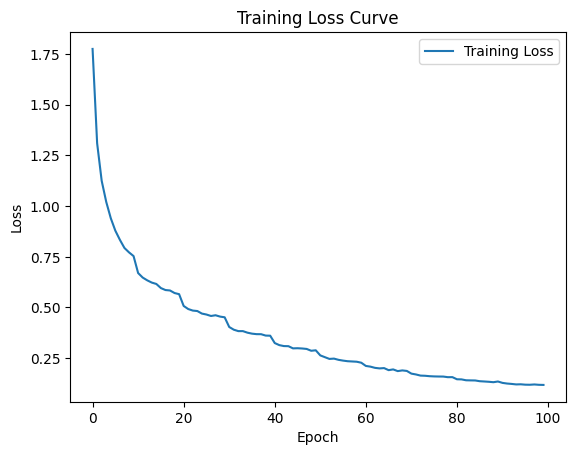


--- Validation ---
### Test or Validation ###


/tmp/ipykernel_4121305/2409967368.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(checkpoint_name, map_location=self.config.device)


Restored model parameters from models/resnet18/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 877.85it/s]


Checkpoint 80 Test accuracy: 0.8322
Restored model parameters from models/resnet18/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 903.44it/s]


Checkpoint 90 Test accuracy: 0.8374
Restored model parameters from models/resnet18/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 890.17it/s]


Checkpoint 100 Test accuracy: 0.8422

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18/model-100.ckpt


100%|██████████| 10000/10000 [00:11<00:00, 889.50it/s]


Checkpoint 100 Test accuracy: 0.8325

--- Training with learning rate 0.01, Residual: True, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 2.015420 Duration 10.243 seconds.
Epoch 2 Loss 1.519559 Duration 9.887 seconds.
Epoch 3 Loss 1.309364 Duration 10.294 seconds.
Epoch 4 Loss 1.192110 Duration 10.143 seconds.
Epoch 5 Loss 1.121833 Duration 10.283 seconds.
Epoch 6 Loss 1.077515 Duration 10.547 seconds.
Epoch 7 Loss 1.032712 Duration 10.029 seconds.
Epoch 8 Loss 1.015717 Duration 10.250 seconds.
Epoch 9 Loss 0.997368 Duration 9.934 seconds.
Epoch 10 Loss 0.973798 Duration 10.076 seconds.
Checkpoint has been created.
Epoch 11 Loss 0.892687 Duration 10.214 seconds.
Epoch 12 Loss 0.879600 Duration 10.512 seconds.
Epoch 13 Loss 0.868323 Duration 10.400 seconds.
Epoch 14 Loss 0.859240 Duration 10.026 seconds.
Epoch 15 Loss 0.850993 Duration 10.282 seconds.
Epoch 16 Loss 0.834239 Duration 10.247 seconds.
Epoch 17 Loss 0.833631 Duration 9.954 seconds.
Epoch 18 Loss 0.822071 Duration 10.

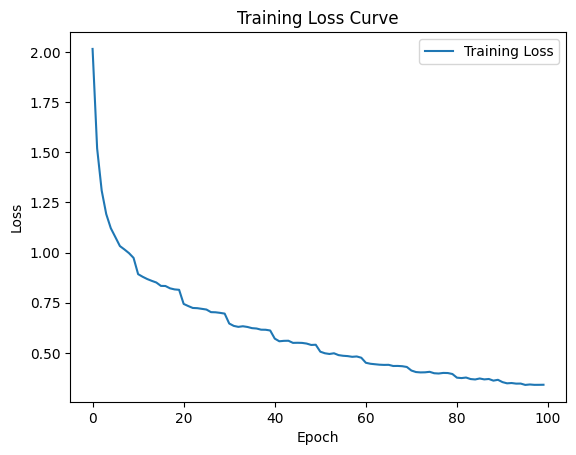


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 901.73it/s]


Checkpoint 80 Test accuracy: 0.8122
Restored model parameters from models/resnet18/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 900.64it/s]


Checkpoint 90 Test accuracy: 0.8144
Restored model parameters from models/resnet18/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 921.99it/s]


Checkpoint 100 Test accuracy: 0.8210

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18/model-100.ckpt


100%|██████████| 10000/10000 [00:11<00:00, 905.44it/s]


Checkpoint 100 Test accuracy: 0.8110

--- Training with learning rate 0.03, Residual: True, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 2.270367 Duration 10.122 seconds.
Epoch 2 Loss 1.701684 Duration 10.073 seconds.
Epoch 3 Loss 1.529191 Duration 10.167 seconds.
Epoch 4 Loss 1.454755 Duration 9.671 seconds.
Epoch 5 Loss 1.421386 Duration 9.932 seconds.
Epoch 6 Loss 1.395383 Duration 10.230 seconds.
Epoch 7 Loss 1.368127 Duration 9.857 seconds.
Epoch 8 Loss 1.368674 Duration 9.860 seconds.
Epoch 9 Loss 1.343795 Duration 9.571 seconds.
Epoch 10 Loss 1.328161 Duration 9.808 seconds.
Checkpoint has been created.
Epoch 11 Loss 1.254560 Duration 10.537 seconds.
Epoch 12 Loss 1.246075 Duration 10.495 seconds.
Epoch 13 Loss 1.233259 Duration 10.501 seconds.
Epoch 14 Loss 1.226457 Duration 10.192 seconds.
Epoch 15 Loss 1.215297 Duration 9.760 seconds.
Epoch 16 Loss 1.204085 Duration 9.986 seconds.
Epoch 17 Loss 1.194840 Duration 10.004 seconds.
Epoch 18 Loss 1.192264 Duration 10.264 s

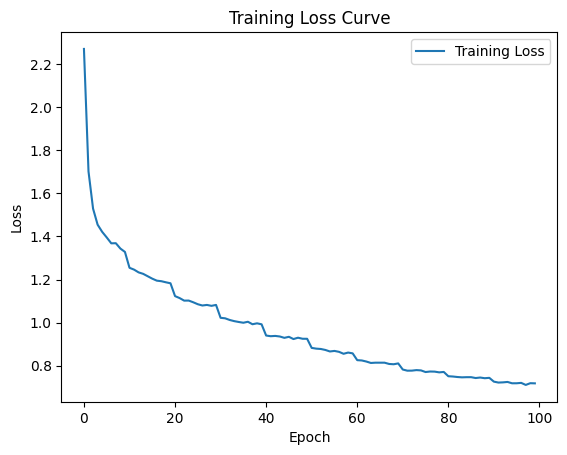


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 910.02it/s]


Checkpoint 80 Test accuracy: 0.6984
Restored model parameters from models/resnet18/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 896.89it/s]


Checkpoint 90 Test accuracy: 0.7140
Restored model parameters from models/resnet18/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 906.63it/s]


Checkpoint 100 Test accuracy: 0.7294

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18/model-100.ckpt


100%|██████████| 10000/10000 [00:11<00:00, 899.03it/s]


Checkpoint 100 Test accuracy: 0.7185

--- Training with learning rate 0.003, Residual: False, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 2.029336 Duration 10.072 seconds.
Epoch 2 Loss 1.791370 Duration 9.841 seconds.
Epoch 3 Loss 1.572112 Duration 10.074 seconds.
Epoch 4 Loss 1.436001 Duration 9.742 seconds.
Epoch 5 Loss 1.335961 Duration 10.007 seconds.
Epoch 6 Loss 1.296467 Duration 9.799 seconds.
Epoch 7 Loss 1.236347 Duration 10.161 seconds.
Epoch 8 Loss 1.195427 Duration 10.013 seconds.
Epoch 9 Loss 1.160569 Duration 9.648 seconds.
Epoch 10 Loss 1.131668 Duration 10.114 seconds.
Checkpoint has been created.
Epoch 11 Loss 1.044812 Duration 9.952 seconds.
Epoch 12 Loss 1.005376 Duration 9.922 seconds.
Epoch 13 Loss 0.995795 Duration 10.098 seconds.
Epoch 14 Loss 0.971033 Duration 9.857 seconds.
Epoch 15 Loss 0.947730 Duration 9.773 seconds.
Epoch 16 Loss 0.944472 Duration 9.966 seconds.
Epoch 17 Loss 0.967970 Duration 9.649 seconds.
Epoch 18 Loss 0.933984 Duration 9.972 se

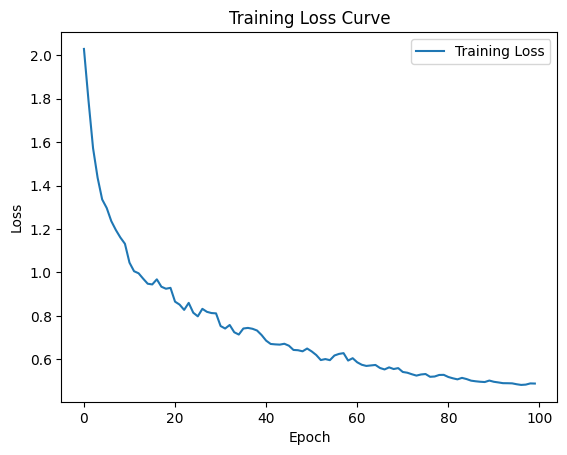


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_residual/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 931.27it/s]


Checkpoint 80 Test accuracy: 0.7898
Restored model parameters from models/resnet18_no_residual/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 936.77it/s]


Checkpoint 90 Test accuracy: 0.7952
Restored model parameters from models/resnet18_no_residual/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 968.41it/s]


Checkpoint 100 Test accuracy: 0.7976

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_residual/model-100.ckpt


100%|██████████| 10000/10000 [00:10<00:00, 959.65it/s]


Checkpoint 100 Test accuracy: 0.7816

--- Training with learning rate 0.01, Residual: False, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 2.249341 Duration 9.822 seconds.
Epoch 2 Loss 1.920256 Duration 9.872 seconds.
Epoch 3 Loss 1.851798 Duration 9.821 seconds.
Epoch 4 Loss 1.823096 Duration 9.996 seconds.
Epoch 5 Loss 1.800676 Duration 9.807 seconds.
Epoch 6 Loss 1.805480 Duration 9.731 seconds.
Epoch 7 Loss 1.779802 Duration 9.698 seconds.
Epoch 8 Loss 1.808325 Duration 9.443 seconds.
Epoch 9 Loss 1.758566 Duration 9.779 seconds.
Epoch 10 Loss 1.724633 Duration 10.156 seconds.
Checkpoint has been created.
Epoch 11 Loss 1.715070 Duration 9.630 seconds.
Epoch 12 Loss 1.691139 Duration 9.614 seconds.
Epoch 13 Loss 1.702257 Duration 9.690 seconds.
Epoch 14 Loss 1.750556 Duration 9.816 seconds.
Epoch 15 Loss 1.764584 Duration 9.710 seconds.
Epoch 16 Loss 1.775146 Duration 10.038 seconds.
Epoch 17 Loss 1.729625 Duration 10.535 seconds.
Epoch 18 Loss 1.657094 Duration 10.362 second

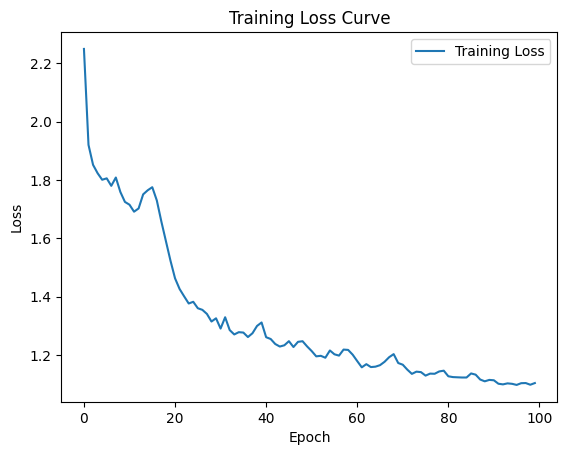


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_residual/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 941.41it/s]


Checkpoint 80 Test accuracy: 0.5838
Restored model parameters from models/resnet18_no_residual/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 952.37it/s]


Checkpoint 90 Test accuracy: 0.5814
Restored model parameters from models/resnet18_no_residual/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 940.00it/s]


Checkpoint 100 Test accuracy: 0.5882

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_residual/model-100.ckpt


100%|██████████| 10000/10000 [00:10<00:00, 964.27it/s]


Checkpoint 100 Test accuracy: 0.5683

--- Training with learning rate 0.03, Residual: False, BatchNorm: True ---
### Training... ###
Epoch 1 Loss 2.230020 Duration 9.735 seconds.
Epoch 2 Loss 1.934454 Duration 9.868 seconds.
Epoch 3 Loss 1.896152 Duration 10.016 seconds.
Epoch 4 Loss 1.881398 Duration 10.047 seconds.
Epoch 5 Loss 1.870995 Duration 10.116 seconds.
Epoch 6 Loss 1.887499 Duration 10.035 seconds.
Epoch 7 Loss 1.864262 Duration 9.747 seconds.
Epoch 8 Loss 1.878509 Duration 9.847 seconds.
Epoch 9 Loss 1.864842 Duration 9.760 seconds.
Epoch 10 Loss 1.858642 Duration 9.599 seconds.
Checkpoint has been created.
Epoch 11 Loss 1.828920 Duration 9.738 seconds.
Epoch 12 Loss 1.825725 Duration 9.788 seconds.
Epoch 13 Loss 1.826513 Duration 9.768 seconds.
Epoch 14 Loss 1.828221 Duration 9.502 seconds.
Epoch 15 Loss 1.823224 Duration 9.606 seconds.
Epoch 16 Loss 1.824379 Duration 9.608 seconds.
Epoch 17 Loss 1.822573 Duration 9.887 seconds.
Epoch 18 Loss 1.819954 Duration 9.925 second

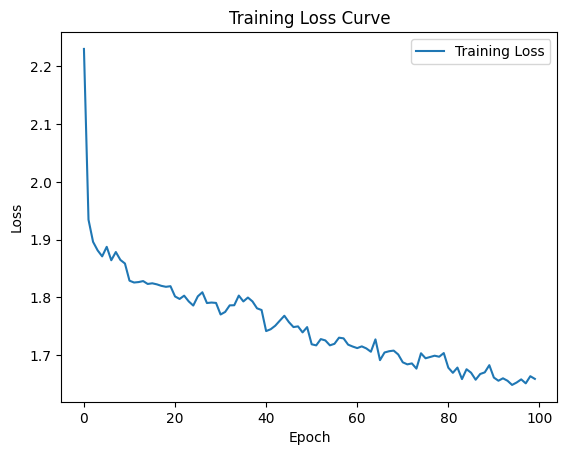


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_residual/model-80.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 941.93it/s]


Checkpoint 80 Test accuracy: 0.2294
Restored model parameters from models/resnet18_no_residual/model-90.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 960.47it/s]


Checkpoint 90 Test accuracy: 0.3398
Restored model parameters from models/resnet18_no_residual/model-100.ckpt


100%|██████████| 5000/5000 [00:05<00:00, 946.91it/s]


Checkpoint 100 Test accuracy: 0.3490

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_residual/model-100.ckpt


100%|██████████| 10000/10000 [00:10<00:00, 954.42it/s]


Checkpoint 100 Test accuracy: 0.3372

--- Training with learning rate 0.003, Residual: True, BatchNorm: False ---
### Training... ###
Epoch 1 Loss 2.093924 Duration 9.470 seconds.
Epoch 2 Loss 1.797718 Duration 9.722 seconds.
Epoch 3 Loss 1.622278 Duration 9.557 seconds.
Epoch 4 Loss 1.476090 Duration 9.348 seconds.
Epoch 5 Loss 1.376049 Duration 9.800 seconds.
Epoch 6 Loss 1.321122 Duration 9.726 seconds.
Epoch 7 Loss 1.260421 Duration 9.537 seconds.
Epoch 8 Loss 1.226171 Duration 9.734 seconds.
Epoch 9 Loss 1.192813 Duration 10.220 seconds.
Epoch 10 Loss 1.164572 Duration 10.160 seconds.
Checkpoint has been created.
Epoch 11 Loss 1.087266 Duration 10.058 seconds.
Epoch 12 Loss 1.051899 Duration 9.648 seconds.
Epoch 13 Loss 1.034624 Duration 9.276 seconds.
Epoch 14 Loss 1.013483 Duration 9.284 seconds.
Epoch 15 Loss 0.988396 Duration 9.240 seconds.
Epoch 16 Loss 0.977267 Duration 9.378 seconds.
Epoch 17 Loss 0.956915 Duration 9.302 seconds.
Epoch 18 Loss 0.939463 Duration 9.562 second

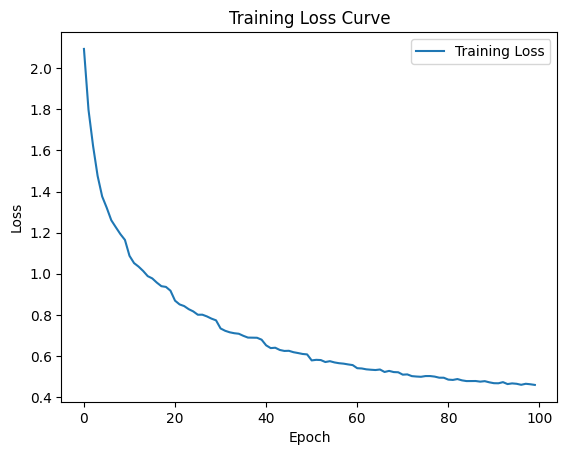


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_bn/model-80.ckpt


100%|██████████| 5000/5000 [00:03<00:00, 1317.43it/s]


Checkpoint 80 Test accuracy: 0.7890
Restored model parameters from models/resnet18_no_bn/model-90.ckpt


100%|██████████| 5000/5000 [00:03<00:00, 1315.19it/s]


Checkpoint 90 Test accuracy: 0.7884
Restored model parameters from models/resnet18_no_bn/model-100.ckpt


100%|██████████| 5000/5000 [00:03<00:00, 1312.21it/s]


Checkpoint 100 Test accuracy: 0.7942

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_bn/model-100.ckpt


100%|██████████| 10000/10000 [00:07<00:00, 1315.78it/s]


Checkpoint 100 Test accuracy: 0.7836

--- Training with learning rate 0.01, Residual: True, BatchNorm: False ---
### Training... ###
Epoch 1 Loss 134.733735 Duration 9.752 seconds.
Epoch 2 Loss 2.303370 Duration 9.489 seconds.
Epoch 3 Loss 2.305671 Duration 9.548 seconds.
Epoch 4 Loss 2.303279 Duration 9.452 seconds.
Epoch 5 Loss 2.303323 Duration 9.678 seconds.
Epoch 6 Loss 2.303358 Duration 9.452 seconds.
Epoch 7 Loss 2.303388 Duration 9.722 seconds.
Epoch 8 Loss 2.303415 Duration 9.714 seconds.
Epoch 9 Loss 2.303326 Duration 9.739 seconds.
Epoch 10 Loss 2262360.786755 Duration 9.593 seconds.
Checkpoint has been created.
Epoch 11 Loss 2.302932 Duration 9.277 seconds.
Epoch 12 Loss 2.302935 Duration 9.745 seconds.
Epoch 13 Loss 2.302959 Duration 9.500 seconds.
Epoch 14 Loss 15365.674003 Duration 9.704 seconds.
Epoch 15 Loss 2.303008 Duration 9.586 seconds.
Epoch 16 Loss 2.303022 Duration 9.530 seconds.
Epoch 17 Loss 2.303057 Duration 9.410 seconds.
Epoch 18 Loss 2.302939 Duration 9.05

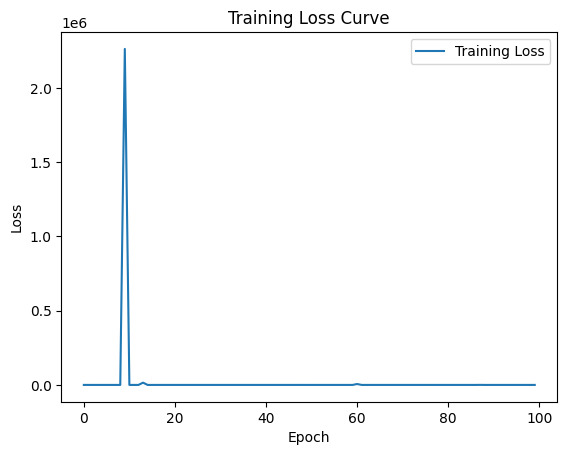


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_bn/model-80.ckpt


100%|██████████| 5000/5000 [00:03<00:00, 1339.25it/s]


Checkpoint 80 Test accuracy: 0.0950
Restored model parameters from models/resnet18_no_bn/model-90.ckpt


100%|██████████| 5000/5000 [00:03<00:00, 1333.09it/s]


Checkpoint 90 Test accuracy: 0.0976
Restored model parameters from models/resnet18_no_bn/model-100.ckpt


100%|██████████| 5000/5000 [00:03<00:00, 1305.15it/s]


Checkpoint 100 Test accuracy: 0.0950

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_bn/model-100.ckpt


100%|██████████| 10000/10000 [00:07<00:00, 1311.91it/s]


Checkpoint 100 Test accuracy: 0.1000

--- Training with learning rate 0.03, Residual: True, BatchNorm: False ---
### Training... ###
Epoch 1 Loss 264052964.642356 Duration 9.745 seconds.
Epoch 2 Loss 9995817454.379230 Duration 10.035 seconds.
Epoch 3 Loss 2.303999 Duration 10.014 seconds.
Epoch 4 Loss 2.304220 Duration 10.149 seconds.
Epoch 5 Loss 2.304034 Duration 9.909 seconds.
Epoch 6 Loss 2.304588 Duration 9.711 seconds.
Epoch 7 Loss 2.304480 Duration 9.377 seconds.
Epoch 8 Loss 2.304577 Duration 9.539 seconds.
Epoch 9 Loss 2.304707 Duration 9.524 seconds.
Epoch 10 Loss 2.304476 Duration 9.421 seconds.
Checkpoint has been created.
Epoch 11 Loss 2.304059 Duration 9.575 seconds.
Epoch 12 Loss 2.303822 Duration 9.570 seconds.
Epoch 13 Loss 2.304138 Duration 9.705 seconds.
Epoch 14 Loss 2.304087 Duration 9.448 seconds.
Epoch 15 Loss 2.303954 Duration 9.722 seconds.
Epoch 16 Loss 2.303927 Duration 9.433 seconds.
Epoch 17 Loss 2.303952 Duration 9.559 seconds.
Epoch 18 Loss 2.303811 Durat

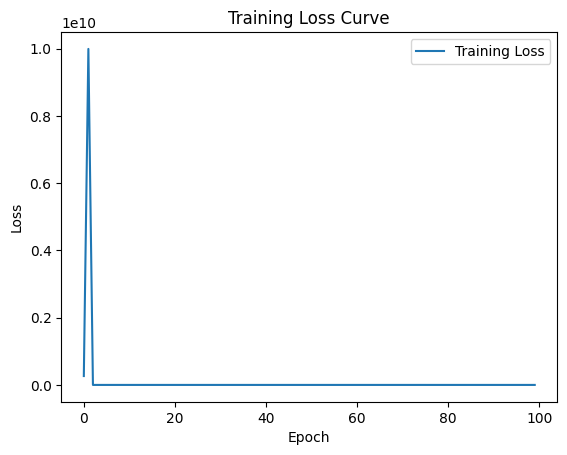


--- Validation ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_bn/model-80.ckpt


100%|██████████| 5000/5000 [00:03<00:00, 1333.40it/s]


Checkpoint 80 Test accuracy: 0.0976
Restored model parameters from models/resnet18_no_bn/model-90.ckpt


100%|██████████| 5000/5000 [00:03<00:00, 1321.94it/s]


Checkpoint 90 Test accuracy: 0.0976
Restored model parameters from models/resnet18_no_bn/model-100.ckpt


100%|██████████| 5000/5000 [00:03<00:00, 1337.29it/s]


Checkpoint 100 Test accuracy: 0.0958

--- Test ---
### Test or Validation ###
Restored model parameters from models/resnet18_no_bn/model-100.ckpt


100%|██████████| 10000/10000 [00:07<00:00, 1318.85it/s]

Checkpoint 100 Test accuracy: 0.1000


In [8]:
# Device setup (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Directory for saving models
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Define configurations for ResNet variations
configs = [
    {"use_residual": True, "use_bn": True, "modeldir": os.path.join(MODEL_DIR, "resnet18")},
    {"use_residual": False, "use_bn": True, "modeldir": os.path.join(MODEL_DIR, "resnet18_no_residual")},
    {"use_residual": True, "use_bn": False, "modeldir": os.path.join(MODEL_DIR, "resnet18_no_bn")}
]

# Define learning rates to test
learning_rates = [0.003, 0.01, 0.03]

# Run experiments for each configuration and learning rate
for config in configs:
    for lr in learning_rates:
        run_experiment(
            batch_size=128,
            save_interval=10,
            weight_decay=2e-4,
            learning_rate=lr,
            modeldir=config["modeldir"],
            use_residual=config["use_residual"],
            use_bn=config["use_bn"],
            device=device
        )


# Run Experiemtn to Log and Plot Losses

In [ ]:
import matplotlib.pyplot as plt

def run_experiment(batch_size, save_interval, weight_decay, learning_rate, modeldir, use_residual, use_bn, device, epochs=100):
    class Config:
        def __init__(self):
            self.batch_size = batch_size
            self.save_interval = save_interval
            self.weight_decay = weight_decay
            self.lr = learning_rate
            self.modeldir = modeldir
            self.use_residual = use_residual
            self.use_bn = use_bn
            self.device = device
    
    config = Config()
    
    # Load and split data
    data_dir = "dataset/cifar-10-batches-py"
    x_train, y_train, x_test, y_test = load_data(data_dir)
    x_train_new, y_train_new, x_valid, y_valid = train_vaild_split(x_train, y_train)

    # Initialize and train the model
    model = Cifar(config).to(device)
    print(f"\n--- Training with learning rate {learning_rate}, Residual: {use_residual}, BatchNorm: {use_bn} ---")

    # Track losses
    training_losses = []
    testing_losses = []

    for epoch in range(1, epochs + 1):
        # Training
        model.network.train()
        epoch_loss = 0
        for i in range(0, len(x_train_new), config.batch_size):
            batch_x = torch.tensor(x_train_new[i:i + config.batch_size], dtype=torch.float32).to(device)
            batch_y = torch.tensor(y_train_new[i:i + config.batch_size], dtype=torch.long).to(device)
            model.optimizer.zero_grad()
            logits = model.network(batch_x)
            loss = model.loss_fn(logits, batch_y)
            loss.backward()
            model.optimizer.step()
            epoch_loss += loss.item()

        avg_training_loss = epoch_loss / (len(x_train_new) // config.batch_size)
        training_losses.append(avg_training_loss)
        print(f"Epoch {epoch}/{epochs}, Training Loss: {avg_training_loss:.4f}")

        # Testing loss every 10 epochs
        if epoch % 10 == 0:
            model.network.eval()
            with torch.no_grad():
                test_loss = 0
                for i in range(0, len(x_test), config.batch_size):
                    batch_x = torch.tensor(x_test[i:i + config.batch_size], dtype=torch.float32).to(device)
                    batch_y = torch.tensor(y_test[i:i + config.batch_size], dtype=torch.long).to(device)
                    logits = model.network(batch_x)
                    loss = model.loss_fn(logits, batch_y)
                    test_loss += loss.item()
                avg_testing_loss = test_loss / (len(x_test) // config.batch_size)
                testing_losses.append(avg_testing_loss)
                print(f"Epoch {epoch}/{epochs}, Testing Loss: {avg_testing_loss:.4f}")

        model.scheduler.step()

    # Final testing accuracy
    model.network.eval()
    with torch.no_grad():
        correct = 0
        for i in range(len(x_test)):
            record = torch.tensor(x_test[i], dtype=torch.float32).unsqueeze(0).to(device)
            label = torch.tensor(y_test[i], dtype=torch.long).to(device)
            logits = model.network(record)
            pred = logits.argmax(dim=1, keepdim=True)
            correct += pred.eq(label.view_as(pred)).sum().item()
        final_accuracy = correct / len(x_test)
        print(f"\nFinal Testing Accuracy: {final_accuracy:.4f}")

    # Plot training and testing loss curves
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs + 1), training_losses, label="Training Loss")
    plt.plot(range(10, epochs + 1, 10), testing_losses, label="Testing Loss", marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss Curves - Residual: {use_residual}, BatchNorm: {use_bn}")
    plt.legend()
    plt.show()
    
    return final_accuracy

# Run Experiments with Best Hyperparameters

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the best hyperparameters from previous experiments
learning_rate_best = 0.01
batch_size_best = 128
weight_decay_best = 2e-4
save_interval_best = 10
epochs = 100

# Directory for saving models
MODEL_DIR = "models_best"
os.makedirs(MODEL_DIR, exist_ok=True)

# Run experiments for each configuration with best hyperparameters
configs = [
    {"use_residual": True, "use_bn": True, "modeldir": os.path.join(MODEL_DIR, "resnet18_best")},
    {"use_residual": False, "use_bn": True, "modeldir": os.path.join(MODEL_DIR, "resnet18_no_residual_best")},
    {"use_residual": True, "use_bn": False, "modeldir": os.path.join(MODEL_DIR, "resnet18_no_bn_best")}
]

for config in configs:
    print(f"\nRunning experiment with Residual: {config['use_residual']}, BatchNorm: {config['use_bn']}")
    final_accuracy = run_experiment(
        batch_size=batch_size_best,
        save_interval=save_interval_best,
        weight_decay=weight_decay_best,
        learning_rate=learning_rate_best,
        modeldir=config["modeldir"],
        use_residual=config["use_residual"],
        use_bn=config["use_bn"],
        device=device,
        epochs=epochs
    )
    print(f"Final Testing Accuracy for Residual: {config['use_residual']}, BatchNorm: {config['use_bn']} is {final_accuracy:.4f}")
